# HW3: Unsupervised Learning
***Name***: Shreyans Kothari | ***UNI***: sk4819

## Unsupervised learning for red wine characteristics


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as ply

In [2]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')

In [3]:
print(wine.shape)
print(wine.columns)
wine.head()

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = wine.copy()
from sklearn.preprocessing import scale
X = scale(X)
X = pd.DataFrame(X)
X = X.rename(columns= {0:'fixed acidity', 1:'volatile acidity', 2:'citric acid', 3:'residual sugar',
      4:'chlorides', 5:'free sulfur dioxide', 6:'total sulfur dioxide', 7:'density',
     8:'pH', 9:'sulphates', 10:'alcohol', 11:'quality'})
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


___
## 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

## Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

## If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

In [5]:
X.groupby('quality').aggregate('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
-3.265165,0.023190,1.992582,-0.513379,0.068248,0.744591,-0.466193,-0.655854,0.380190,0.562964,-0.520193,-0.439283
-2.026494,-0.310472,0.928147,-0.497199,0.110348,0.068282,-0.345301,-0.310856,-0.108243,0.456117,-0.364310,-0.148206
-0.787823,-0.087549,0.274970,-0.140135,-0.007060,0.111989,0.106047,0.305493,0.189187,-0.039942,-0.219409,-0.491186
0.450848,0.015823,-0.169472,0.014629,-0.043712,-0.053356,-0.015619,-0.170226,-0.069759,0.045089,0.101386,0.193870
1.689519,0.317557,-0.692170,0.535073,0.128981,-0.231211,-0.174975,-0.348112,-0.340485,-0.131914,0.490443,0.978969
2.928190,0.141926,-0.583715,0.616901,0.027650,-0.404290,-0.248367,-0.396027,-0.813283,-0.284382,0.646954,1.568955


In [6]:
from sklearn.cluster import KMeans

within_cluster_variance = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state= 0)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

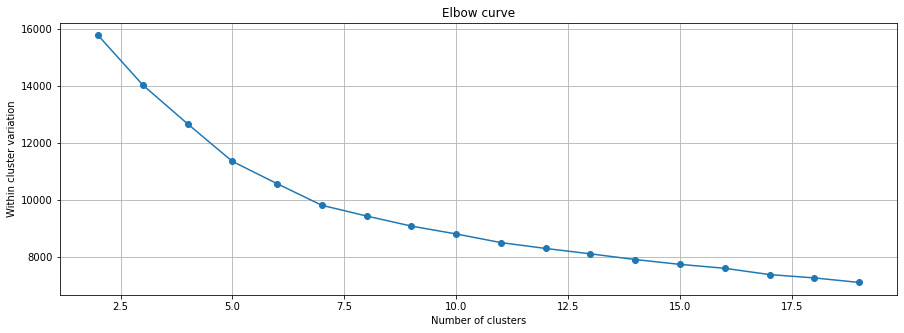

In [7]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster variation')

plt.title('Elbow curve') 

In [8]:
kmeans = KMeans(n_clusters= 7, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_
centers.shape

(7, 12)

In [9]:
X['cluster'] = kmeans.labels_
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,4
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2


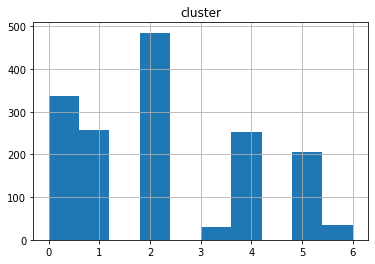

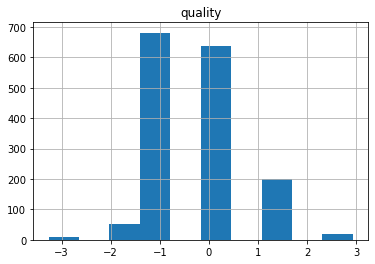

In [10]:
var = ['cluster', 'quality']
for var in X[var]:
    X.hist(var)

In [11]:
#df = X.groupby('cluster').mean()
#df.sort_values('quality')
X.groupby('cluster').mean().sort_values('quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
1,0.197069,-1.006324,0.722488,-0.106209,-0.283650,-0.315490,-0.539697,-0.563478,-0.208398,0.456852,1.019001,1.053315
5,-1.077106,0.394100,-0.923056,-0.238991,-0.414151,0.246607,-0.186889,-1.310554,1.154000,-0.134737,1.163291,0.462933
4,1.649840,-0.574072,1.239628,0.116616,0.065484,-0.499587,-0.446346,1.141878,-0.982190,0.243698,-0.054849,0.131350
6,-0.085633,-0.034652,0.414856,4.961768,0.296388,1.750191,1.695832,1.225001,-0.325460,-0.023789,-0.363913,-0.022761
3,0.081831,0.017955,1.144178,-0.399396,5.604731,-0.070479,0.474416,0.185803,-1.687357,3.720608,-0.882563,-0.360695
0,-0.122608,0.025354,0.057921,-0.022058,-0.039873,0.996220,1.228121,0.205587,-0.098346,-0.173120,-0.571036,-0.420264
2,-0.420087,0.648688,-0.774526,-0.211923,-0.036866,-0.488178,-0.403711,0.019387,0.325034,-0.412266,-0.528102,-0.506887


In [12]:
display(X.groupby(['cluster', 'quality']).mean())

fixed acidity  volatile acidity  citric acid  \
cluster quality                                                   
0       -3.265165       1.195232         -0.490607     0.765247   
        -2.026494       0.204167         -0.399827     0.354443   
        -0.787823      -0.126931          0.114153     0.069803   
         0.450848      -0.164083         -0.101634    -0.029592   
         1.689519       0.256832         -1.049255     0.653988   
1       -2.026494       0.103624         -0.714066     0.662546   
        -0.787823       0.184058         -1.088360     0.636871   
         0.450848       0.093263         -1.022238     0.727787   
         1.689519       0.286853         -1.007230     0.699093   
         2.928190       0.421825         -0.808607     0.942999   
2       -3.265165      -0.577605          2.809404    -1.288771   
        -2.026494      -0.451252          1.250756    -0.836076   
        -0.787823      -0.433481          0.653244    -0.753208   
         0.450848      -0.382046          0.388518    -0.764997   
         1.689519      -0.356000          0.603411    -1.032019   
3       -2.026494       0.505795         -0.043689     3.743574   
        -0.787823       0.087665          0.113043     1.118995   
         0.450848       0.071706         -0.003342     0.799481   
         1.689519      -0.356000         -1.440308     2.100359   
4       -3.265165       1.539950          0.375297     1.561179   
        -2.026494       1.712309         -0.281114     0.983487   
        -0.787823       1.508612         -0.510287     1.212813   
         0.450848       1.648263         -0.593865     1.164265   
         1.689519       1.986442         -0.734816     1.550176   
         2.928190       2.459199         -1.216849     2.305761   
5       -2.026494      -1.562514          1.562423    -1.147558   
        -0.787823      -1.273508          0.554741    -0.969776   
         0.450848      -0.987093          0.362954    -0.886327   
         1.689519      -1.137362          0.234039    -0.995340   
         2.928190      -1.347065          0.305466    -0.865130   
6       -2.026494      -1.332702         -1.105120     0.251743   
        -0.787823      -0.075917          0.668587     0.065597   
         0.450848      -0.245882         -0.539489     0.264580   
         1.689519       0.517286         -0.859315     1.925768   

                   residual sugar  chlorides  free sulfur dioxide  \
cluster quality                                                     
0       -3.265165       -0.737010   1.222800             1.733315   
        -2.026494       -0.435481   0.091039             1.183438   
        -0.787823        0.017117  -0.006984             0.978574   
         0.450848       -0.080365  -0.124324             0.931136   
         1.689519       -0.228550  -0.286214             2.450546   
1       -2.026494        2.668484  -0.796303            -1.231239   
        -0.787823       -0.435481  -0.515754            -0.676580   
         0.450848       -0.250261  -0.255727            -0.222412   
         1.689519        0.020726  -0.285448            -0.356777   
         2.928190        0.201684  -0.312373            -0.488261   
2       -3.265165        0.281598   0.588225            -0.684777   
        -2.026494       -0.074208  -0.059135            -0.614672   
        -0.787823       -0.238876  -0.083930            -0.467876   
         0.450848       -0.229496   0.017714            -0.480537   
         1.689519        0.055241   0.238044            -0.609639   
3       -2.026494        0.610998  11.105781             1.542054   
        -0.787823       -0.508400   5.929319            -0.142110   
         0.450848       -0.413803   4.328205             0.001336   
         1.689519        0.681946   5.749843            -1.039977   
4       -3.265165       -0.275849   1.052770            -0.800900   
        -2.026494        0.007942  -0.434990            -0.083669   
        -0.787823  

In [13]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'cluster'],
      dtype='object')

Text(0, 0.5, 'Sulphates')

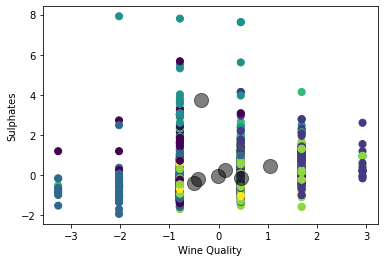

In [14]:
plt.scatter(X.iloc[:,11], X.iloc[:, 9], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 11], centers[:, 9], c='black', s=200, alpha=0.5);
plt.xlabel('Wine Quality')
plt.ylabel('Sulphates')

Text(0, 0.5, 'Alcohol')

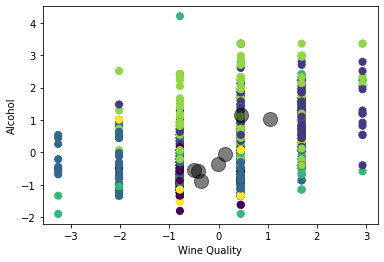

In [15]:
plt.scatter(X.iloc[:,11], X.iloc[:, 10], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 11], centers[:, 10], c='black', s=200, alpha=0.5);
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')

There is little variability between the variables across each cluster. On an average, wines in cluster 1 have the highest quality of all, followed by wines in cluster 5, then cluster 4, cluster 6, cluster 3, cluster 0, and finally cluster 2. 

The quality is positive for clusters 1, 5, and 4. The wine quality is negative for clusters 6, 3, 0, and 2. 

Looking at all the variable across clusters for various qualities of wine, suplhates and alcohol concentration cluster with both higher and lower values of wine quality. As the unit of sulphate increases, so does the quality of wine. Similarly, as alcohol content increases, the quality of wine also improves. 

High values of sulphates and alcohol cluster with high values of quality.


According to this analysis, the most important characteristics to make a good bottle of wine are alcohol concentration and sulphates; these two variables also have the highest correlation with quality of all variables. 

___
## 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

## Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

## If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

In [16]:
X_ac = wine.copy()
X_ac = scale(X_ac)
X_ac = pd.DataFrame(X_ac)
X_ac = X_ac.rename(columns= {0:'fixed acidity', 1:'volatile acidity', 2:'citric acid', 3:'residual sugar',
      4:'chlorides', 5:'free sulfur dioxide', 6:'total sulfur dioxide', 7:'density',
     8:'pH', 9:'sulphates', 10:'alcohol', 11:'quality'})
X_ac.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [17]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=7,
                             affinity='euclidean', #affinity = similarity label
                             linkage='complete') #
labels = ac.fit_predict(X_ac)    # extract cluster labels for each observation in data
labels

array([2, 2, 2, ..., 2, 2, 2])

In [18]:
X_ac['cluster'] = ac.labels_
X_ac.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823,2


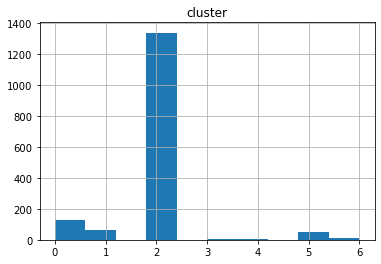

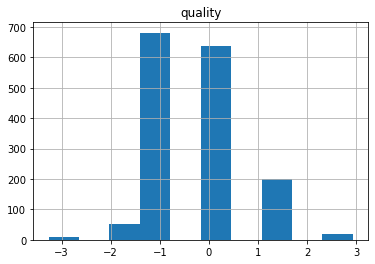

In [19]:
var = ['cluster', 'quality']
for var in X_ac[var]:
    X_ac.hist(var)

In [20]:
X_ac.groupby('cluster').mean().sort_values('quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
4,-0.624115,-1.291336,1.364336,5.293553,-0.675866,3.167777,5.956069,-1.185471,-1.259873,-0.815259,1.136122,1.276629
5,2.482856,-0.657106,1.592896,0.192963,-0.056174,-0.471818,-0.452472,1.468131,-1.625762,0.646183,0.131191,0.669437
0,-1.097587,0.430947,-0.721546,-0.283762,-0.402129,-0.181139,-0.185685,-1.592195,1.127159,-0.297306,1.529161,0.165001
6,0.284822,-0.598039,0.630946,6.832574,0.639140,0.982981,0.505067,1.903286,-0.500635,0.115332,-0.599218,0.069719
2,0.009946,-0.002846,-0.029360,-0.042682,-0.107648,0.023370,-0.003717,0.069548,0.012269,-0.125419,-0.114821,-0.027203
1,0.012429,-0.100884,0.528057,-0.328215,2.707187,-0.106439,0.430325,0.260289,-1.022300,2.585018,-0.724833,-0.335609
3,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158


In [21]:
display(X_ac.groupby(['cluster','quality']).mean())

fixed acidity  volatile acidity  citric acid  \
cluster quality                                                   
0       -3.265165      -0.577605          2.809404    -1.288771   
        -2.026494      -1.090123          2.296424    -1.071958   
        -0.787823      -1.051485          1.266193    -1.015803   
         0.450848      -1.050362         -0.165794    -0.492839   
         1.689519      -1.374486          0.102321    -0.854627   
         2.928190      -1.696572          0.328743    -0.843734   
1       -2.026494      -0.212368          0.696519    -0.826617   
        -0.787823      -0.034574         -0.047464     0.532088   
         0.450848       0.123608         -0.197924     0.571008   
         1.689519      -0.356000         -1.440308     2.100359   
2       -3.265165       1.425044          0.086662     1.295869   
        -2.026494      -0.134806          0.706994    -0.476150   
        -0.787823      -0.127133          0.282679    -0.199094   
         0.450848       0.066063         -0.144289    -0.012161   
         1.689519       0.351001         -0.772778     0.602365   
         2.928190       0.204167         -0.690789     0.722455   
3       -2.026494       0.505795         -0.043689     3.743574   
        -0.787823      -0.356000         -0.658202     2.511163   
4        0.450848      -1.390155         -1.328579    -0.107711   
         1.689519      -0.241094         -1.272714     2.100359   
5       -0.787823       2.781820         -0.350945     1.519704   
         0.450848       2.462223         -0.622919     1.727393   
         1.689519       2.405336         -0.869440     1.480944   
         2.928190       1.731460         -1.067876     1.655322   
6       -2.026494      -1.332702         -1.105120     0.251743   
        -0.787823       1.042024         -0.565094     0.987766   
         0.450848       0.153895         -0.525523     0.534170   
         1.689519       0.678154         -0.769931     0.713897   

                   residual sugar  chlorides  free sulfur dioxide  \
cluster quality                                                     
0       -3.265165        0.281598   0.588225            -0.684777   
        -2.026494       -0.098479  -0.113823            -0.636203   
        -0.787823       -0.244109  -0.200081            -0.526591   
         0.450848       -0.350851  -0.490857            -0.066593   
         1.689519       -0.320998  -0.672645             0.025002   
         2.928190       -0.571465  -0.803388             0.362607   
1       -2.026494       -0.807957  -0.243707             0.203223   
        -0.787823       -0.330498   2.789831             0.076577   
         0.450848       -0.326746   2.698548            -0.387193   
         1.689519        0.681946   5.749843            -1.039977   
2       -3.265165       -0.429569   1.109447             0.043838   
        -2.026494        0.009716  -0.131593            -0.339482   
        -0.787823       -0.033191  -0.070391             0.131657   
         0.450848       -0.110281  -0.124119            -0.001264   
         1.689519        0.118883  -0.198898            -0.204883   
         2.928190        0.197136  -0.316324            -0.211177   
3       -2.026494        0.610998  11.105781             1.542054   
        -0.787823       -0.524166  11.127035            -0.753085   
4        0.450848        7.705778  -0.434990             5.367284   
         1.689519        4.087440  -0.796303             2.068023   
5       -0.787823        0.583711   0.300716            -0.392630   
         0.450848        0.090092  -0.102761            -0.496392   
         1.689519        0.043416  -0.234408            -0.406423   
         2.928190       -0.051181  -0.357060            -1.008100   
6       -2.026494        7.351039  -0.711289            -0.944346   
        -0.787823        8.391606   1.534521             1.733315   
         0.450848        6.473060   0.601129             1.039992   
       

On an average, wines in cluster 4 have the highest quality of all, followed by wines in cluster 5, then cluster 0, cluster 6, cluster 2, cluster 1, and finally cluster 3. 

The quality is positive for clusters 4, 5, 0, and 6. The wine quality is negative for clusters 2, 1, and 3.

Looking at all the variable across clusters for various qualities of wine, suplhates and alcohol concentration cluster with both higher and lower values of wine quality. As the unit of sulphate increases, so does the quality of wine. Similarly, as alcohol content increases, the quality of wine also improves. 

High values of sulphates and alcohol cluster with high values of quality.

According to this analysis, the most important characteristics to make a good bottle of wine are alcohol concentration and sulphates; these two variables also have the highest correlation with quality of all variables. My conclusions have not changes using Hierarchichal clustering (compared to using K means clustering). As we can see from the table above, in each cluster, as the wine quality increases, so do sulphates and alocohol. This is also evident in a similar table in question 1.

___
## 3. Use Principal Components Analysis to reduce the dimensions of your data. How much of the variation in your data is explained by the first two principal components. How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In [22]:
X_pca = wine.copy()
X_pca = scale(X_pca)
X_pca = pd.DataFrame(X_pca)
X_pca = X_pca.rename(columns= {0:'fixed acidity', 1:'volatile acidity', 2:'citric acid', 3:'residual sugar',
      4:'chlorides', 5:'free sulfur dioxide', 6:'total sulfur dioxide', 7:'density',
     8:'pH', 9:'sulphates', 10:'alcohol', 11:'quality'})
X_pca.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_plot = pd.DataFrame(pca.fit_transform(X_pca), index=X_pca.index)
df_plot = df_plot.rename(columns={0:'PC1', 1:'PC2'})
df_plot

,PC1,PC2
0,-1.779442,1.157303
1,-1.004185,2.071838
2,-0.915783,1.393434
3,2.404077,-0.213792
4,-1.779442,1.157303
...,...,...
1594,-2.241991,0.599594
1595,-2.122456,-0.370101
1596,-1.366265,-0.517561
1597,-2.367147,0.703545


Text(0.5, 1.0, 'Principal Components')

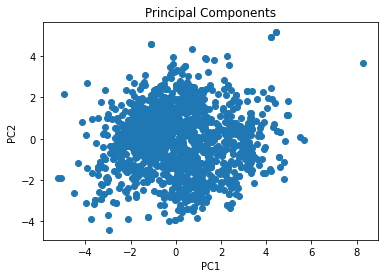

In [25]:
plt.scatter(df_plot['PC1'], df_plot['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components')

In [26]:
np.sqrt(pca.explained_variance_)

array([1.76723537, 1.49775999])

In [27]:
print("Proportion of variance explained by the first two PCs: {}".format(pca.explained_variance_ratio_))

Proportion of variance explained by the first two PCs: [0.26009731 0.1868235 ]


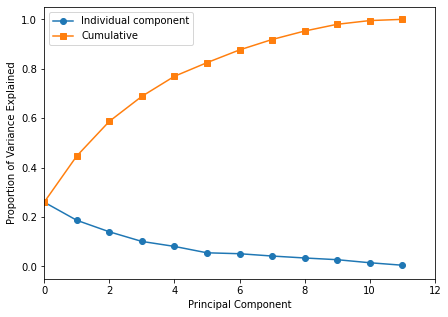

In [28]:
plt.figure(figsize=(7,5))
plt.plot( PCA().fit(X_pca).explained_variance_ratio_, '-o', label='Individual component')
plt.plot( np.cumsum(PCA().fit(X_pca).explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0, 12)
plt.ylim(-0.05,1.05)
#plt.xticks([1,2,3,4])
plt.legend(loc=2);

In [31]:
wine_name = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

Text(0.5, 1.0, 'Heat Map of the first two Principal Components on the Red Wine dataset')

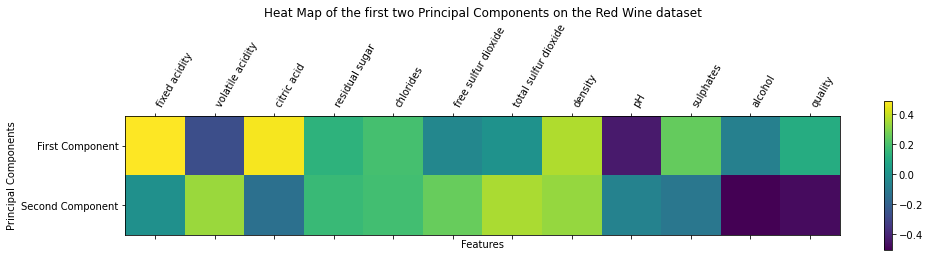

In [32]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['First Component', 'Second Component'])
plt.colorbar()
plt.xticks(range(len(wine_name)), wine_name, rotation = 60, ha = 'left')
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.title("Heat Map of the first two Principal Components on the Red Wine dataset")

The first Principal Component explains about 26% and the second Principal Component explains about 19% (~18.685) of the total variance in the data.  

Principal Component Analysis has a lot of uses including feature extraction and reduce dimensionality in data. In dimensionality reduction, one or more of the smallest principal components are zeroed out, resulting in a lower-dimensional projection of the data that preserves the maximal data variance. The first Principal Component (PC1) contains the most information about the data of all the PCs. PC2 contains the second most information about the data. Feature extraction allows us to select a subset of the total featuers in the dataset which are more important in explaining the data.

As we can see from the Heatmap above, not all features are as important in explaining the red wine dataset. In PC1, fixied acidity and citric acidity seem to explain the most variation in the red wine dataset and pH seems to explain the least. In the second Principal Component, volatile acidity and total sulfur dioxide explain the most variation in the dataset and alcohol, and quality explain the least. This allows to pick the features that are most important for explaining the variance in the data set. Reducing dimensionality and feature selection (as preprocessing steps) allow us to avoid the trap of overfitting our supervised learning model and improve predicitibility on new unseen data. 

The first two components could be used to reduce number of features in our dataset in order to conduct supervised learning on another variable tied to wine (e.g. - wine price). As a preprocessing tool, PCA allows us to clean and transform data before we can use it to create supervised learning models. 